#Classify The Size_Categorie Using SVM
**Data Description:**    
  
month : month of the year: 'jan' to 'dec'              
day : day of the week: 'mon' to 'sun'                  
FFMC : FFMC index from the FWI system: 18.7 to 96.20                       
DMC : DMC index from the FWI system: 1.1 to 291.3                   
DC : DC index from the FWI system: 7.9 to 860.6                 
ISI : ISI index from the FWI system: 0.0 to 56.10                        
temp : temperature in Celsius degrees: 2.2 to 33.30                     
RH : relative humidity in %: 15.0 to 100                   
wind : wind speed in km/h: 0.40 to 9.40                   
rain : outside rain in mm/m2 : 0.0 to 6.4                      
Size_Categorie : the burned area of the forest ( Small , Large)            

In [2]:
import pandas as pd
ff = pd.read_csv('/content/forestfires (1).csv')
ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
ff.shape

(517, 31)

In [4]:
ff.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:

ff.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:

mappings = {}
for i in dict(ff.dtypes):
 if dict(ff.dtypes)[i] == 'O':
  mappings[i] = dict(zip(ff[i].unique(), range(len(ff[i].unique()))))
  ff[i] = ff[i].map(lambda x: mappings[i][x])

In [8]:
ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,2,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,2,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,2,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


#EDA
**Exploratory data analysis**

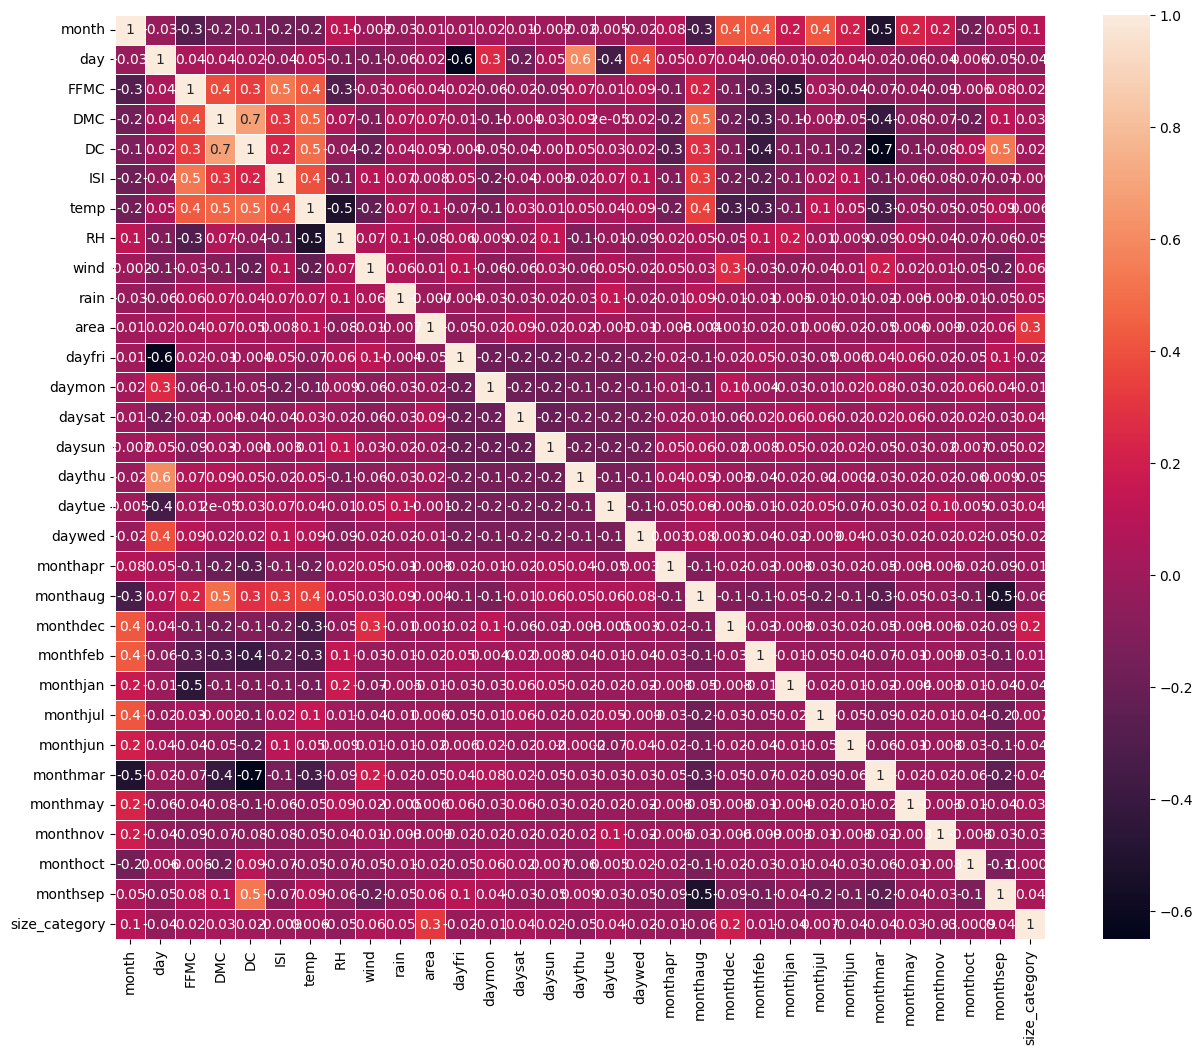

In [9]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize = (15, 12))
corr = ff.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 0.5)
plt.show()

In [10]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(ff)

Output hidden; open in https://colab.research.google.com to view.

In [11]:
# Split X and Y Variables
Y = ff['size_category']
X = ff.drop('size_category', axis =1)
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,2,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,2,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,2,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((387, 30), (387,), (130, 30), (130,))

** Model Fitting**

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
svc = SVC()
svc= svc.fit(X_train, Y_train)
pred = svc.predict(X_test)
print ('Accuracy:', accuracy_score(Y_test, pred))
print ('\n clasification report:\n', classification_report(Y_test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_test, pred))

Accuracy: 0.8

 clasification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       101
           1       1.00      0.10      0.19        29

    accuracy                           0.80       130
   macro avg       0.90      0.55      0.54       130
weighted avg       0.84      0.80      0.73       130


 confussion matrix:
 [[101   0]
 [ 26   3]]


**Tuning**

In [14]:

from sklearn.model_selection import GridSearchCV
params = [{'kernel':['rbf','poly'],'gamma': [0.01,0.02,0.03],'C':[100,150,200]}]
svc = SVC()
optimize_model = GridSearchCV(estimator=svc, param_grid=params, refit = True, verbose=1)
optimize_model.fit(X, Y)
print("Best parameters: ", optimize_model.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'poly'}


In [15]:
# With the best parameters

svc = SVC(C=100, kernel='poly', gamma=0.01)
svc= svc.fit(X_train, Y_train)
pred = svc.predict(X_test)
print ('Accuracy:', accuracy_score(Y_test, pred))
print ('\n clasification report:\n', classification_report(Y_test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_test, pred))

Accuracy: 0.9846153846153847

 clasification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       101
           1       1.00      0.93      0.96        29

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130


 confussion matrix:
 [[101   0]
 [  2  27]]
